In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display the first few rows of the dataset
print(df.head())


   work_year experience_level employment_type                job_title  \
0       2023               EN              FT        Applied Scientist   
1       2023               EN              FT        Applied Scientist   
2       2023               EN              FT     Data Quality Analyst   
3       2023               EN              FT  Compliance Data Analyst   
4       2023               EN              FT        Applied Scientist   

   salary salary_currency  salary_in_usd company_location company_size  
0  213660             USD         213660               US            L  
1  130760             USD         130760               US            L  
2  100000             USD         100000               NG            L  
3   30000             USD          30000               NG            L  
4  204620             USD         204620               US            L  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [3]:
# Convert 'experience_level' to categorical codes
df['experience_level'] = df['experience_level'].astype('category').cat.codes

# Convert 'employment_type' to categorical codes
df['employment_type'] = df['employment_type'].astype('category').cat.codes

# Convert 'company_location' to categorical codes
df['company_location'] = df['company_location'].astype('category').cat.codes

# Convert 'company_size' to categorical codes
df['company_size'] = df['company_size'].astype('category').cat.codes

# Convert 'job_title' to categorical codes 
df['job_title'] = df['job_title'].astype('category').cat.codes

# Convert 'salary_currency' to numeric
# If 'USD' is the only currency, it can be represented as a constant or removed if redundant
df['salary_currency'] = (df['salary_currency'] == 'USD').astype(int)

# Ensure 'work_year', 'salary', and 'salary_in_usd' are numeric
df['work_year'] = df['work_year'].astype(int)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         3761 non-null   int64
 1   experience_level  3761 non-null   int8 
 2   employment_type   3761 non-null   int8 
 3   job_title         3761 non-null   int8 
 4   salary            3761 non-null   int64
 5   salary_currency   3761 non-null   int64
 6   salary_in_usd     3761 non-null   int64
 7   company_location  3761 non-null   int8 
 8   company_size      3761 non-null   int8 
dtypes: int64(4), int8(5)
memory usage: 136.0 KB


In [5]:
# Import the libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')


In [7]:
# Prepare data
X = df[['work_year', 'experience_level', 'employment_type','job_title','salary_currency','salary_in_usd','company_location','company_size']]  # Features
y =df['salary']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1.200000e+05, 1.530000e+05, 1.958000e+05, 1.750000e+05,
       5.000000e+04, 1.600000e+05, 1.100000e+05, 7.500000e+04,
       1.387840e+05, 1.750000e+05, 7.500000e+04, 2.898000e+05,
       1.745000e+05, 1.450000e+05, 1.914750e+05, 6.120000e+04,
       1.387840e+05, 5.200000e+04, 1.060000e+05, 1.671000e+05,
       1.912000e+05, 1.850000e+05, 7.200000e+04, 1.100000e+05,
       1.150000e+05, 1.300000e+05, 5.000000e+04, 1.390000e+05,
       2.880000e+05, 1.900000e+05, 5.000000e+04, 2.475000e+05,
       1.649960e+05, 1.470000e+05, 8.000000e+04, 7.200000e+04,
       2.400000e+05, 1.859000e+05, 1.065000e+05, 1.690000e+05,
       1.835000e+05, 2.053000e+05, 2.023530e+05, 1.750000e+05,
       9.000000e+04, 1.600000e+06, 1.000000e+05, 2.250000e+05,
       7.200000e+04, 1.700000e+05, 2.500000e+04, 8.000000e+04,
       6.500000e+04, 4.000000e+04, 1.450000e+05, 1.150000e+05,
       7.000000e+04, 7.390000e+04, 1.300000e+05, 1.750000e+05,
       2.500000e+04, 1.570000e+05, 1.100000e+05, 7.0000

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 58464842989.10624
R-squared: 0.7501267313953999


In [11]:
# Tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


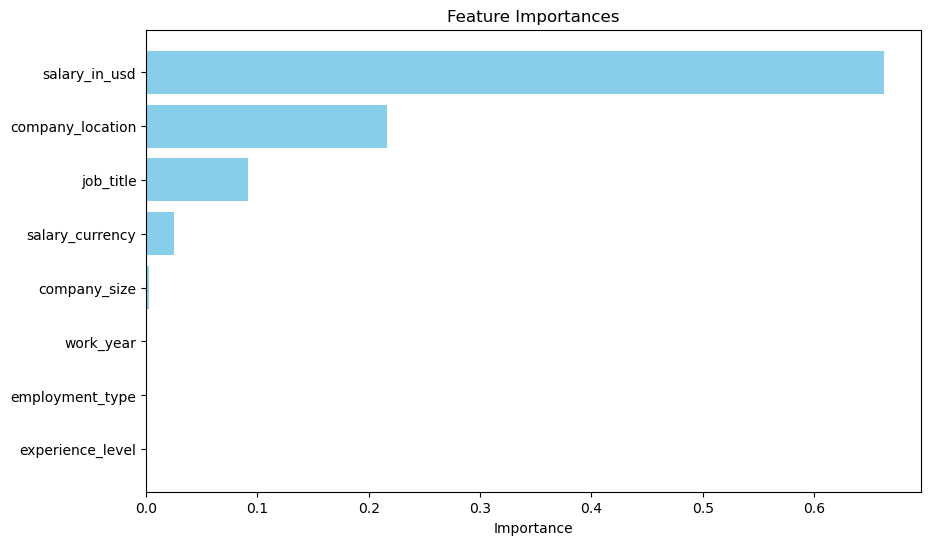

In [12]:
# Feature importance 
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


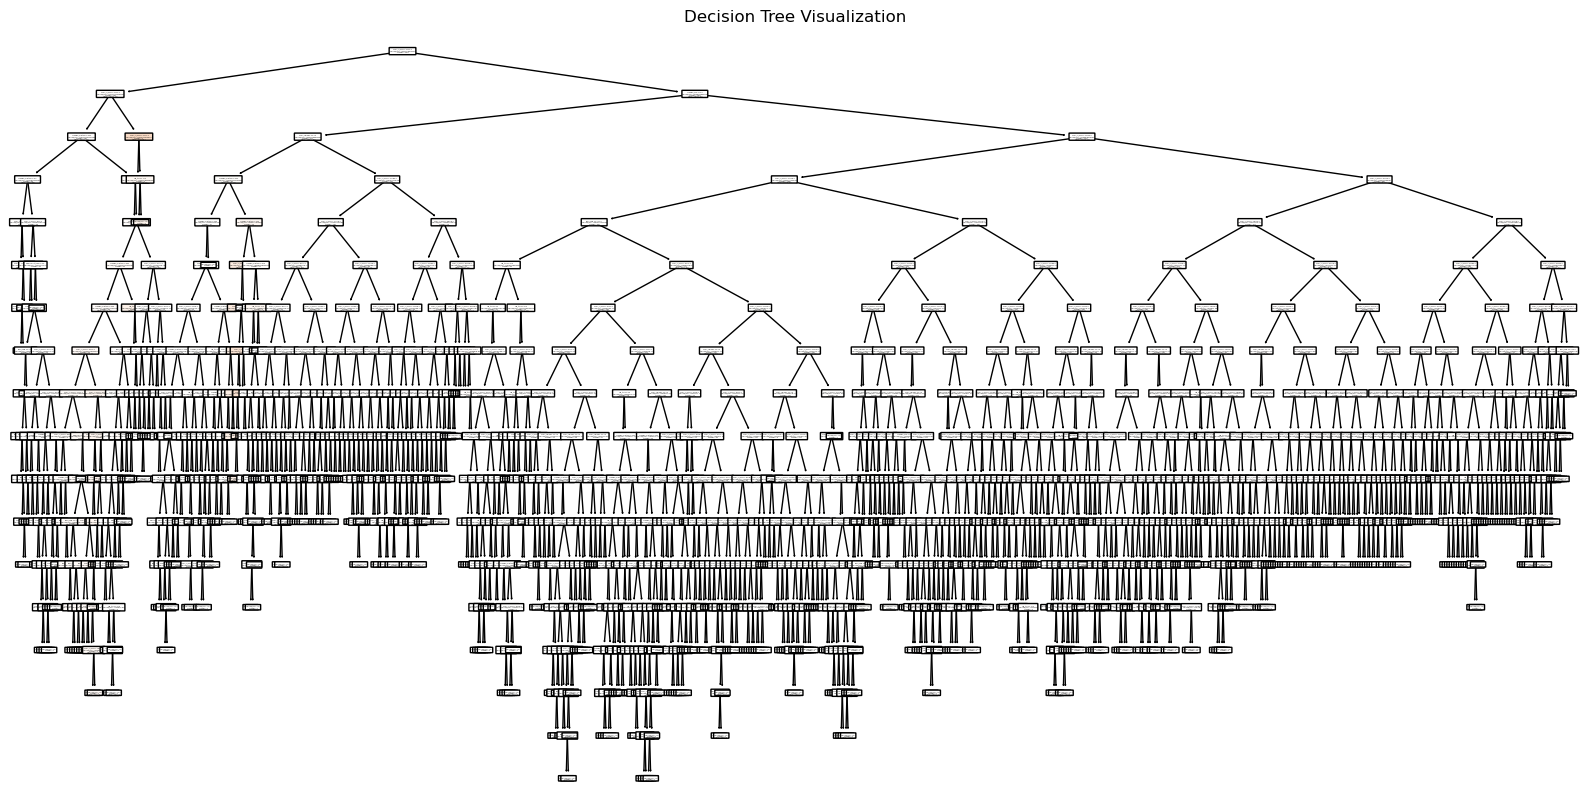

In [13]:
# Visualize the decision tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, class_names=['Not High Salary', 'High Salary'])
plt.title('Decision Tree Visualization')
plt.show()


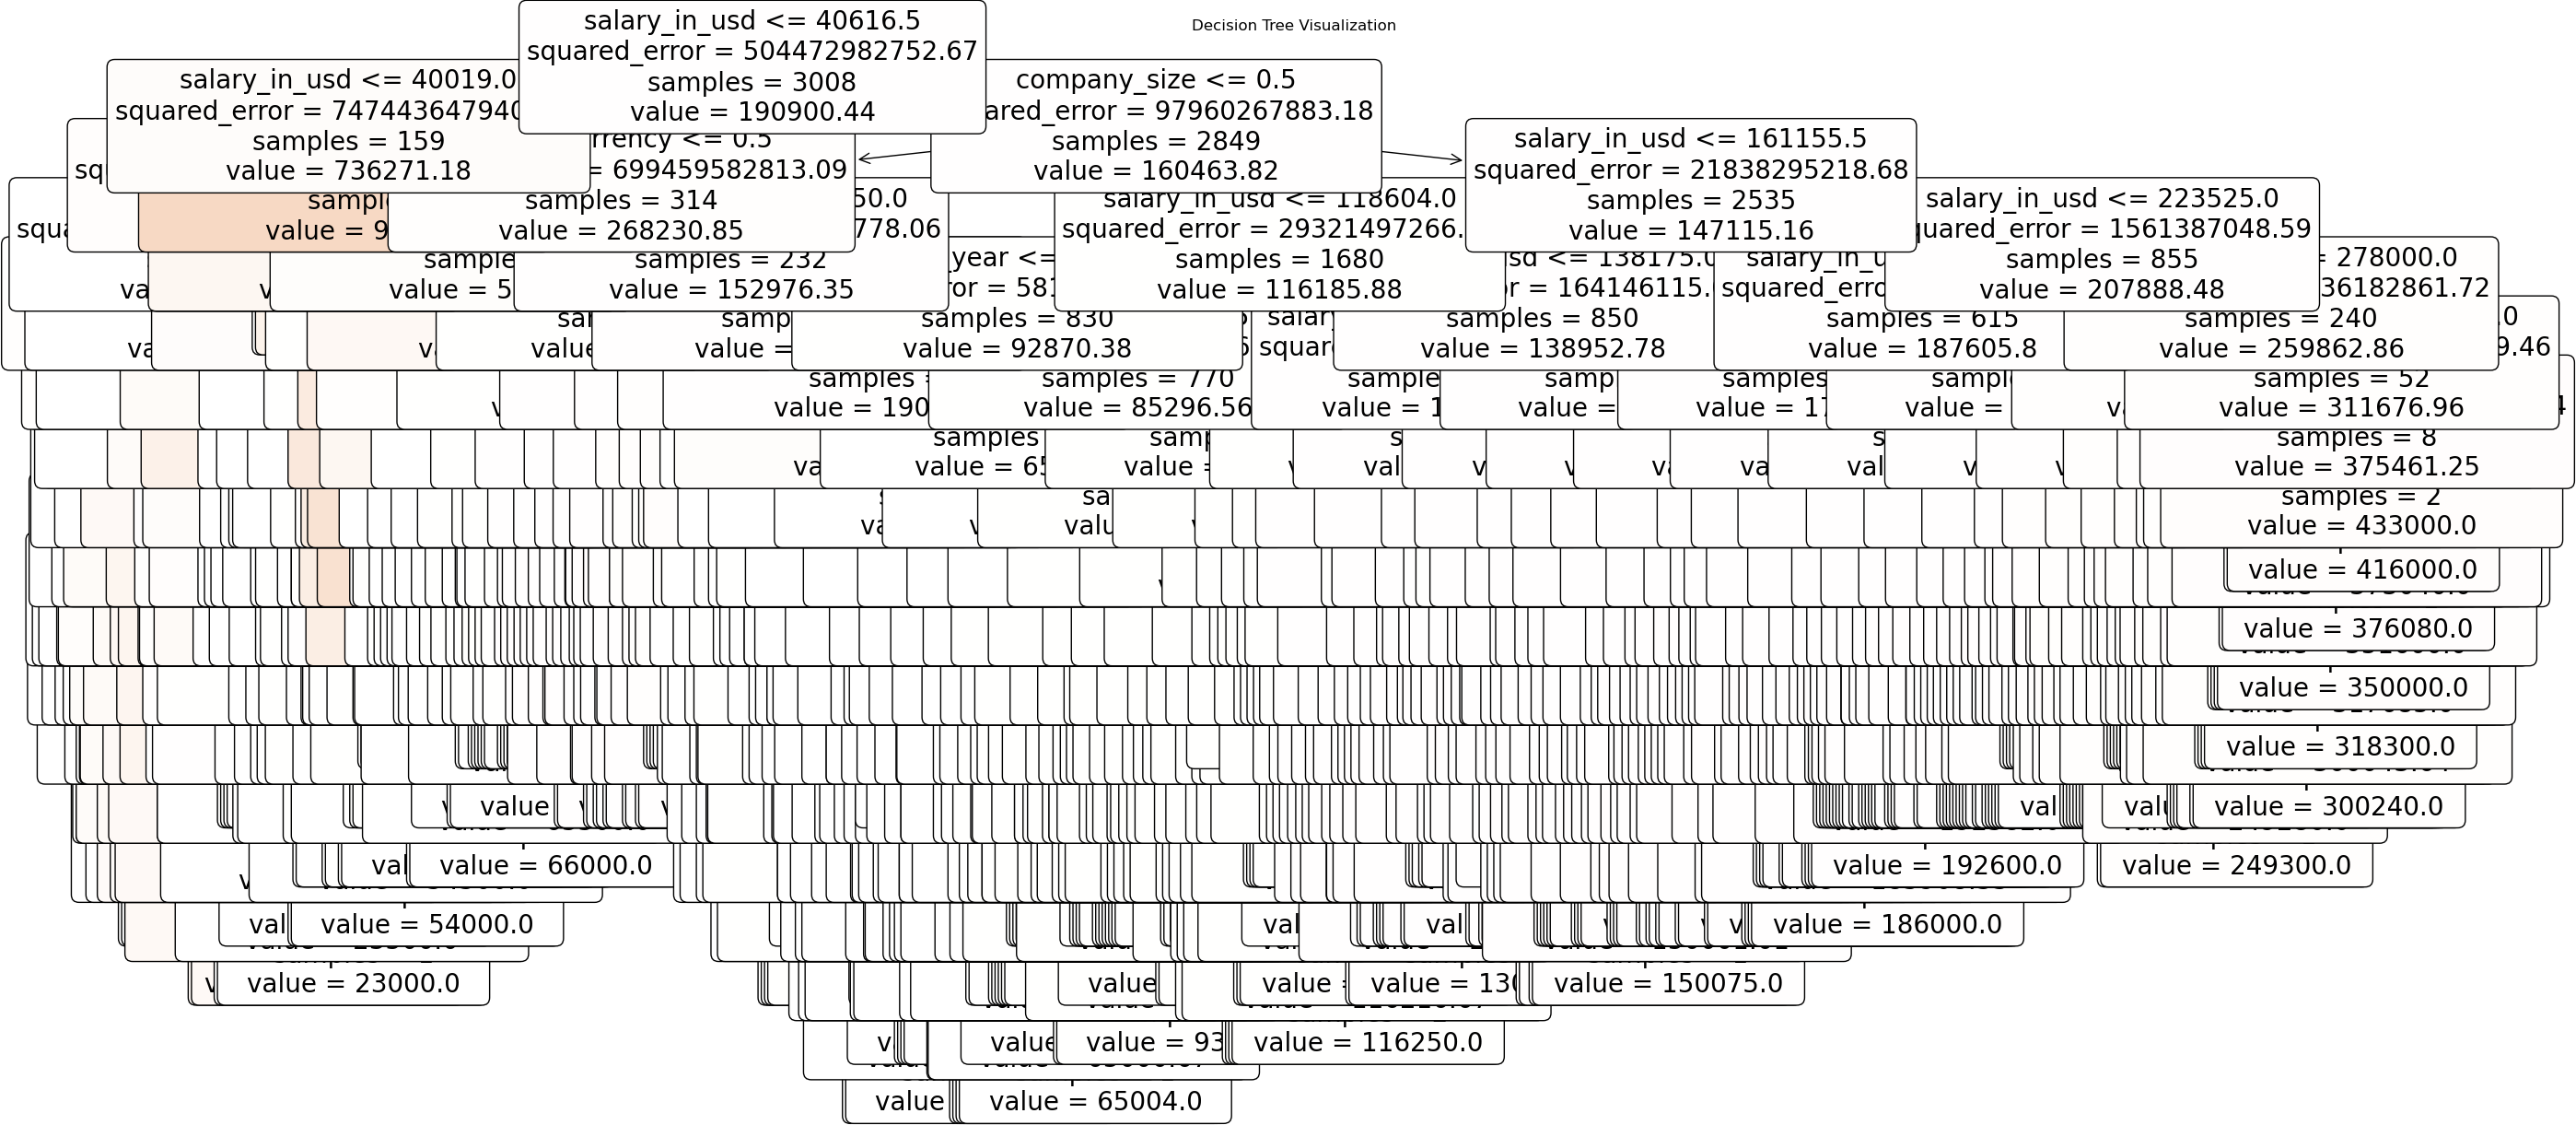

In [14]:
# Visualize the decision tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree with increased figure size and font size
plt.figure(figsize=(30, 15))  # Increase figure size
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          rounded=True, 
          precision=2,  # Set precision to 2 decimal places
          fontsize=20)  # Increase font size
plt.title('Decision Tree Visualization')
plt.show()
